## Carregar o arquivo .Json

In [1]:
import os
import json

# Definir o caminho para o arquivo
file_path = os.path.join('..', 'data', 'stores.json')

# Carregar o arquivo JSON
with open(file_path, 'r', encoding='utf-8') as f:
    apps_data = json.load(f)

# Exibir os dados carregados
apps_data


{'Temu': {'titulo': 'Temu: Compre como um bilionário',
  'descrição': 'Compre na Temu e receba ofertas exclusivas. Não importa o que você esteja procurando, a Temu tem o que você precisa, incluindo moda, decoração para casa, artesanato, beleza e cosméticos, roupas, sapatos e muito mais. Baixe o app da Temu hoje mesmo e aproveite ofertas incríveis diariamente.',
  'store': 'google'},
 'Shopee': {'titulo': 'Shopee: 11.11 A Maior Liquida',
  'descrição': 'No 11.11 A Maior Liquida você economiza nas suas compras online com os melhores preços do ano! Quer promoção de verdade? Olha na Shopee! De 28 de outubro a 12 de novembro, você poderá aproveitar as diversas ofertas e vantagens na Shopee, como R$ 11 milhões em cupons e frete grátis* (*Confira as condições de frete grátis e o valor mínimo de compra no aplicativo).',
  'store': 'google'},
 'AliExpress': {'titulo': 'AliExpress: Compras online',
  'descrição': 'Venha para o AliExpress: Seu Aplicativo de Compra Favorito! Procurando um produto 

## Análise de Palavras-Chave

In [2]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marcio.nogueira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from rake_nltk import Rake
import openai
from dotenv import load_dotenv
import os
import nltk
from nltk.corpus import stopwords

# Carregar variáveis do arquivo .env
load_dotenv()

# Recuperar a chave da API do OpenAI do arquivo .env
openai_api_key = os.getenv('OPENAI_API_KEY')

# Baixar stop words do NLTK (se ainda não estiverem baixadas)
nltk.download('stopwords')

# Obter stop words em português
stop_words = set(stopwords.words('portuguese'))

# Função para extrair palavras-chave usando RAKE
def extrair_palavras_chave_rake(descricao):
    r = Rake(language='portuguese')  # Configura o Rake para português
    r.extract_keywords_from_text(descricao)
    
    # Obter as palavras-chave ordenadas por relevância
    palavras_chave = r.get_ranked_phrases()
    
    # Filtrar palavras-chave para remover duplicatas e stop words
    palavras_chave_filtradas = set()
    
    for frase in palavras_chave:
        # Dividir a frase em palavras
        palavras = frase.split()
        # Adicionar palavras que não estão na lista de stop words
        for palavra in palavras:
            if palavra.lower() not in stop_words:
                palavras_chave_filtradas.add(palavra.lower())
    
    return list(palavras_chave_filtradas)

# Processar as descrições de cada aplicativo e extrair palavras-chave
for app, data in apps_data.items():
    descricao = data['descrição']
    
    print(f"App: {app}")
    
    # Extrair palavras-chave usando RAKE
    palavras_chave = extrair_palavras_chave_rake(descricao)
    
    print("Palavras-chave filtradas:")
    print(palavras_chave)
    print()


App: Temu
Palavras-chave filtradas:
['diariamente', 'casa', 'procurando', 'moda', 'app', 'artesanato', 'decoração', 'incluindo', 'exclusivas', 'sapatos', 'roupas', 'baixe', 'incríveis', 'beleza', 'temu', 'aproveite', 'hoje', 'compre', 'cosméticos', 'receba', 'precisa', 'ofertas', 'importa']

App: Shopee
Palavras-chave filtradas:
['(*', 'grátis', 'compras', 'vantagens', 'verdade', 'compra', 'outubro', 'confira', 'condições', '11', '28', 'olha', 'aproveitar', ').', 'melhores', 'diversas', 'poderá', 'liquida', 'economiza', 'milhões', 'novembro', '12', 'valor', 'online', 'preços', 'cupons', 'quer', 'r', 'frete', 'shopee', 'ano', 'maior', 'ofertas', 'promoção', 'aplicativo', 'mínimo']

App: AliExpress
Palavras-chave filtradas:
['opções', 'aliexpress', 'on', 'compras', 'vantagens', 'compra', 'procurando', 'economizar', 'lojas', 'produto', 'venha', 'melhor', 'line', 'baixe', 'nenhum', 'favorito', 'mundo', 'internacionais', 'descubra', 'encontra', 'agora', 'ofertas', 'lugar', 'aplicativo', 'mã

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marcio.nogueira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re

# Função para extrair palavras-chave
def extrair_palavras_chaves(texto):
    # Remover pontuação e colocar tudo em minúsculas
    texto_limpo = re.sub(r'[^\w\s]', '', texto.lower())
    
    # Tokenização
    palavras = nltk.word_tokenize(texto_limpo)
    
    # Remover stop words
    palavras_sem_stop = [palavra for palavra in palavras if palavra not in stopwords.words('portuguese')]
    
    # Contar a frequência das palavras
    contagem = Counter(palavras_sem_stop)
    
    # Obter as 10 palavras mais comuns
    palavras_chaves = contagem.most_common(10)
    
    return [palavra for palavra, _ in palavras_chaves]

# Contar palavras nos títulos e descrições
palavras_titulos = Counter()
palavras_descricoes = Counter()

for app, data in apps_data.items():
    if 'titulo' in data and 'descrição' in data:
        palavras_titulos.update(extrair_palavras_chaves(data['titulo']))
        palavras_descricoes.update(extrair_palavras_chaves(data['descrição']))

# Imprimir as palavras mais frequentes
print("Palavras mais frequentes nos títulos:", palavras_titulos.most_common(10))
print("Palavras mais frequentes nas descrições:", palavras_descricoes.most_common(10))


Palavras mais frequentes nos títulos: [('temu', 1), ('compre', 1), ('bilionário', 1), ('shopee', 1), ('1111', 1), ('maior', 1), ('liquida', 1), ('aliexpress', 1), ('compras', 1), ('online', 1)]
Palavras mais frequentes nas descrições: [('procurando', 2), ('frete', 2), ('grátis', 2), ('aplicativo', 2), ('compra', 2), ('temu', 1), ('ofertas', 1), ('compre', 1), ('receba', 1), ('exclusivas', 1)]


In [9]:
from collections import Counter
import re

# Função para contar palavras
def contar_palavras(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return Counter(words)

# Contar palavras nos títulos e descrições
palavras_titulos = Counter()
palavras_descricoes = Counter()

for app, data in apps_data.items():
    palavras_titulos.update(contar_palavras(data['titulo']))
    palavras_descricoes.update(contar_palavras(data['descrição']))

print("Palavras mais frequentes nos títulos:", palavras_titulos.most_common(10))
print("Palavras mais frequentes nas descrições:", palavras_descricoes.most_common(10))


Palavras mais frequentes nos títulos: [('11', 2), ('temu', 1), ('compre', 1), ('como', 1), ('um', 1), ('bilionário', 1), ('shopee', 1), ('a', 1), ('maior', 1), ('liquida', 1)]
Palavras mais frequentes nas descrições: [('e', 17), ('o', 12), ('de', 10), ('você', 7), ('para', 6), ('frete', 6), ('grátis', 6), ('ofertas', 5), ('com', 5), ('em', 5)]


## Análise de tamanho de títulos e Descrições

In [11]:
# Limites recomendados para o Google Play
limite_titulo = 30
limite_descricao = 4000

for app, data in apps_data.items():
    tamanho_titulo = len(data['titulo'])
    tamanho_descricao = len(data['descrição'])
    
    print(f"App: {app}")
    print(f"Tamanho do título: {tamanho_titulo} caracteres {'- OK' if tamanho_titulo <= limite_titulo else '- EXCEDEU'}")
    print(f"Tamanho da descrição: {tamanho_descricao} caracteres {'- OK' if tamanho_descricao <= limite_descricao else '- EXCEDEU'}")
    print()


App: Temu
Tamanho do título: 31 caracteres - EXCEDEU
Tamanho da descrição: 290 caracteres - OK

App: Shopee
Tamanho do título: 29 caracteres - OK
Tamanho da descrição: 364 caracteres - OK

App: AliExpress
Tamanho do título: 26 caracteres - OK
Tamanho da descrição: 335 caracteres - OK

App: Mercado Livre
Tamanho do título: 13 caracteres - OK
Tamanho da descrição: 277 caracteres - OK

App: Amazon Shopping
Tamanho do título: 15 caracteres - OK
Tamanho da descrição: 395 caracteres - OK



## Contador de Densidade das palavras

$$
\text{Densidade de uma palavra} = \frac{N_{\text{úmero de ocorrências da palavra}}}{N_{\text{úmero total de palavras na descrição}}} \times 100
$$


### Explicação do Código:
- **Função `calcular_densidade_palavras(text)`**: Extrai as palavras da descrição, calcula o total de palavras e a densidade de cada uma.
- **Densidade**: A densidade é calculada dividindo o número de ocorrências de cada palavra pelo número total de palavras e multiplicando por 100 para obter a porcentagem.
- **Exibição**: Exibimos a densidade das 10 palavras mais frequentes em cada descrição.

In [12]:
import re
from collections import Counter

# Função para contar palavras em um texto e calcular a densidade
def calcular_densidade_palavras(text):
    # Transformar em minúsculas e contar todas as palavras
    palavras = re.findall(r'\b\w+\b', text.lower())
    total_palavras = len(palavras)
    contagem_palavras = Counter(palavras)
    
    # Calcular a densidade para cada palavra
    densidade_palavras = {palavra: (contagem / total_palavras) * 100 for palavra, contagem in contagem_palavras.items()}
    
    return densidade_palavras, total_palavras

# Calcular densidade de palavras nas descrições dos aplicativos
for app, data in apps_data.items():
    descricao = data['descrição']
    densidade, total_palavras = calcular_densidade_palavras(descricao)
    
    print(f"App: {app}")
    print(f"Total de palavras na descrição: {total_palavras}")
    print(f"Densidade de palavras (em %):")
    
    # Ordenar e exibir as palavras com maior densidade
    densidade_ordenada = sorted(densidade.items(), key=lambda x: x[1], reverse=True)
    
    for palavra, densidade_perc in densidade_ordenada[:10]:  # Mostrar as 10 palavras mais frequentes
        print(f"Palavra: '{palavra}', Densidade: {densidade_perc:.2f}%")
    
    print()


App: Temu
Total de palavras na descrição: 47
Densidade de palavras (em %):
Palavra: 'e', Densidade: 8.51%
Palavra: 'temu', Densidade: 6.38%
Palavra: 'o', Densidade: 6.38%
Palavra: 'ofertas', Densidade: 4.26%
Palavra: 'que', Densidade: 4.26%
Palavra: 'você', Densidade: 4.26%
Palavra: 'compre', Densidade: 2.13%
Palavra: 'na', Densidade: 2.13%
Palavra: 'receba', Densidade: 2.13%
Palavra: 'exclusivas', Densidade: 2.13%

App: Shopee
Total de palavras na descrição: 66
Densidade de palavras (em %):
Palavra: 'de', Densidade: 9.09%
Palavra: '11', Densidade: 4.55%
Palavra: 'e', Densidade: 4.55%
Palavra: 'no', Densidade: 3.03%
Palavra: 'a', Densidade: 3.03%
Palavra: 'você', Densidade: 3.03%
Palavra: 'na', Densidade: 3.03%
Palavra: 'shopee', Densidade: 3.03%
Palavra: 'as', Densidade: 3.03%
Palavra: 'frete', Densidade: 3.03%

App: AliExpress
Total de palavras na descrição: 56
Densidade de palavras (em %):
Palavra: 'o', Densidade: 5.36%
Palavra: 'de', Densidade: 5.36%
Palavra: 'um', Densidade: 5.36%

## Gráfico de Densidade de Palavras

In [ ]:
import matplotlib.pyplot as plt

# Função para calcular densidade e plotar gráfico de barras
def plotar_densidade_palavras(app, densidade_palavras):
    # Ordenar as palavras pela densidade em ordem decrescente
    densidade_ordenada = sorted(densidade_palavras.items(), key=lambda x: x[1], reverse=True)
    
    # Selecionar as 10 palavras com maior densidade
    palavras = [item[0] for item in densidade_ordenada[:10]]
    densidades = [item[1] for item in densidade_ordenada[:10]]
    
    # Criar o gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.barh(palavras, densidades, color='skyblue')
    plt.xlabel('Densidade (%)')
    plt.ylabel('Palavras')
    plt.title(f'Densidade das Principais Palavras na Descrição do App "{app}"')
    plt.gca().invert_yaxis()  # Inverter para que as palavras com maior densidade fiquem no topo
    plt.show()

# Calcular e plotar a densidade para cada aplicativo
for app, data in apps_data.items():
    descricao = data['descrição']
    densidade, total_palavras = calcular_densidade_palavras(descricao)
    
    print(f"App: {app}")
    print(f"Total de palavras na descrição: {total_palavras}")
    
    # Plotar gráfico de densidade de palavras
    plotar_densidade_palavras(app, densidade)


## Chamada para Ação (CTA)
 Verificamos se as descrições contêm expressões comuns de CTA, como "baixe agora", "aproveite", "descubra", etc.

In [13]:
# Lista de CTAs comuns
ctas_comuns = ["baixe agora", "aproveite", "descubra", "compre", "não perca"]

# Verificar se as CTAs aparecem nas descrições
for app, data in apps_data.items():
    descricao = data['descrição'].lower()
    ctas_presentes = [cta for cta in ctas_comuns if cta in descricao]
    
    print(f"App: {app}")
    if ctas_presentes:
        print(f"CTAs presentes: {', '.join(ctas_presentes)}")
    else:
        print("Nenhuma CTA encontrada.")
    print()


App: Temu
CTAs presentes: aproveite, compre

App: Shopee
Nenhuma CTA encontrada.

App: AliExpress
CTAs presentes: baixe agora, descubra

App: Mercado Livre
Nenhuma CTA encontrada.

App: Amazon Shopping
CTAs presentes: aproveite, compre



## Foco em Promoções e Benefícios

In [14]:
# Lista de palavras relacionadas a promoções
palavras_promocao = ["frete grátis", "oferta", "promoção", "desconto", "exclusivo"]

# Verificar se há menção a promoções nas descrições
for app, data in apps_data.items():
    descricao = data['descrição'].lower()
    promocoes_presentes = [palavra for palavra in palavras_promocao if palavra in descricao]
    
    print(f"App: {app}")
    if promocoes_presentes:
        print(f"Promoções mencionadas: {', '.join(promocoes_presentes)}")
    else:
        print("Nenhuma promoção mencionada.")
    print()


App: Temu
Promoções mencionadas: oferta

App: Shopee
Promoções mencionadas: frete grátis, oferta, promoção

App: AliExpress
Promoções mencionadas: oferta

App: Mercado Livre
Promoções mencionadas: frete grátis, oferta

App: Amazon Shopping
Promoções mencionadas: frete grátis



## Diferenciação de Concorrentes
Comparação básicoa de como os concorrentes mencionam ofertas e vantagens

In [ ]:
# Concorrentes: Shopee, AliExpress, Mercado Livre
concorrentes = ["Shopee", "AliExpress", "Mercado Livre"]

for concorrente in concorrentes:
    if concorrente in apps_data:
        descricao = apps_data[concorrente]['descrição']
        print(f"{concorrente} - Descrição: {descricao}")
        print()


## Análise de Localização (Traduções)
verificar se as descrições parecem apropriadas ao público brasileiro  (usaremos um simples verificador de expressões culturais).

In [ ]:
# Palavras relacionadas à cultura brasileira
palavras_locais = ["brasil", "frete", "oferta", "reais"]

# Verificar se as descrições estão adaptadas ao Brasil
for app, data in apps_data.items():
    descricao = data['descrição'].lower()
    locais_presentes = [palavra for palavra in palavras_locais if palavra in descricao]
    
    print(f"App: {app}")
    if locais_presentes:
        print(f"Adaptações culturais encontradas: {', '.join(locais_presentes)}")
    else:
        print("Nenhuma adaptação cultural encontrada.")
    print()


## Visualização ChangesLog

In [3]:
import pandas as pd
import json

# Caminho para o arquivo JSON
file_path = '../data/changesLog.json'

# Carregar o arquivo JSON
with open(file_path) as f:
    data = json.load(f)

# Acessar o conteúdo do JSON
content = data['content']

# Converter o conteúdo em um DataFrame
df = pd.json_normalize(content, record_path=['changes'], meta=['_id'], meta_prefix='parent_')

# Exibir o DataFrame
print(df)




                        _id                      date        field  \
0  66f6bdcaf8d712010b2c223a  2024-09-27T14:14:34.228Z  screenshots   
1  66f5c0a6f8d712010bcb15d3  2024-09-26T20:14:30.519Z      version   
2  66ec0821f8d712010bfb61f3  2024-09-19T11:16:48.487Z      version   
3  66e2245af8d712010bf8aac4  2024-09-11T23:14:34.161Z      version   
4  66f6bddcf8d712010b2c6ff1  2024-09-27T14:14:52.289Z  screenshots   
5  66f5c0bcf8d712010bcb1ed9  2024-09-26T20:14:52.022Z      version   
6  66ec31f3f8d712010b0642e9  2024-09-19T14:15:15.065Z      version   
7  66e22470f8d712010bf8b698  2024-09-11T23:14:55.734Z      version   

                                       previousValue  \
0  [https://play-lh.googleusercontent.com/l8uMyDd...   
1                                            7.078.4   
2                                            7.077.9   
3                                            7.076.2   
4  [https://play-lh.googleusercontent.com/l8uMyDd...   
5                                

## Analise ChangesLog
Resultados Esperados:
- Gráfico de atualizações por mês: Quantas atualizações de versão ocorreram a cada mês.
- Lista de mudanças de capturas de tela: Uma lista mostrando as URLs antigas e novas das capturas de tela do aplicativo.
- Mudanças combinadas: Mudanças de versão e capturas de tela organizadas em uma linha do tempo.
- Gráfico de atualizações por dia da semana: Mostrará se há um padrão nos dias em que as atualizações acontecem.


Analisando versões:
Atualizações por mês:
 date
2024-09-30 00:00:00+00:00    6
Freq: ME, Name: currentValue, dtype: int64


C:\Users\marcio.nogueira\AppData\Local\Temp\ipykernel_25176\2055039424.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_versions['date'] = pd.to_datetime(df_versions['date'])
C:\Users\marcio.nogueira\AppData\Local\Temp\ipykernel_25176\2055039424.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  updates_per_month = df_versions.resample('M').count()['currentValue']


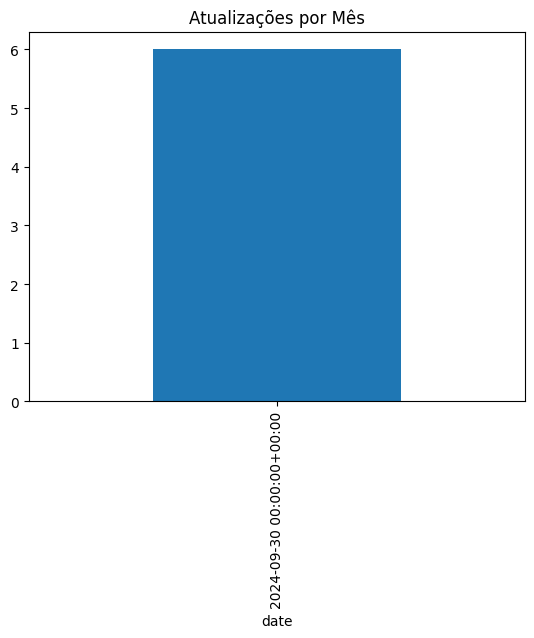


Analisando mudanças de screenshots:
Mudanças nas capturas de tela:
                        date  \
0  2024-09-27T14:14:34.228Z   
4  2024-09-27T14:14:52.289Z   

                                       previousValue  \
0  [https://play-lh.googleusercontent.com/l8uMyDd...   
4  [https://play-lh.googleusercontent.com/l8uMyDd...   

                                        currentValue  
0  [https://play-lh.googleusercontent.com/VGjWsq6...  
4  [https://play-lh.googleusercontent.com/VGjWsq6...  

Analisando mudanças combinadas:
Mudanças combinadas (versão e screenshots):
                        date        field  \
3  2024-09-11T23:14:34.161Z      version   
7  2024-09-11T23:14:55.734Z      version   
2  2024-09-19T11:16:48.487Z      version   
6  2024-09-19T14:15:15.065Z      version   
1  2024-09-26T20:14:30.519Z      version   
5  2024-09-26T20:14:52.022Z      version   
0  2024-09-27T14:14:34.228Z  screenshots   
4  2024-09-27T14:14:52.289Z  screenshots   

                            

C:\Users\marcio.nogueira\AppData\Local\Temp\ipykernel_25176\2055039424.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_versions['date'] = pd.to_datetime(df_versions['date'])
C:\Users\marcio.nogueira\AppData\Local\Temp\ipykernel_25176\2055039424.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_versions['weekday'] = df_versions.index.weekday


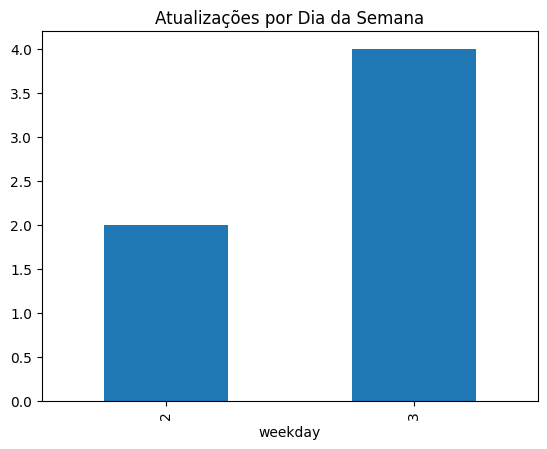

In [4]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# Função para carregar o arquivo JSON
def load_json(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return data['content']

# Função para processar mudanças de versões
def analyze_versions(content):
    df = pd.json_normalize(content, record_path=['changes'], meta=['_id'], meta_prefix='parent_')
    df_versions = df[df['field'] == 'version']
    df_versions['date'] = pd.to_datetime(df_versions['date'])
    df_versions.set_index('date', inplace=True)
    
    # Mostrar frequência de atualizações por mês
    updates_per_month = df_versions.resample('M').count()['currentValue']
    print("Atualizações por mês:\n", updates_per_month)

    # Plotar gráfico
    updates_per_month.plot(kind='bar', title='Atualizações por Mês')
    plt.show()

# Função para analisar mudanças de screenshots
def analyze_screenshots(content):
    df = pd.json_normalize(content, record_path=['changes'], meta=['_id'], meta_prefix='parent_')
    df_screenshots = df[df['field'] == 'screenshots']
    
    # Mostrar mudanças de screenshots
    print("Mudanças nas capturas de tela:\n", df_screenshots[['date', 'previousValue', 'currentValue']])

# Função para combinar mudanças de versão e screenshots
def analyze_combined_changes(content):
    df = pd.json_normalize(content, record_path=['changes'], meta=['_id'], meta_prefix='parent_')
    
    # Filtrar por mudanças de versão e screenshots
    df_combined = df[(df['field'] == 'screenshots') | (df['field'] == 'version')]
    df_combined = df_combined.sort_values('date')

    # Mostrar mudanças combinadas
    print("Mudanças combinadas (versão e screenshots):\n", df_combined[['date', 'field', 'previousValue', 'currentValue']])

# Função para análise temporal das atualizações
def analyze_update_patterns(content):
    df = pd.json_normalize(content, record_path=['changes'], meta=['_id'], meta_prefix='parent_')
    df_versions = df[df['field'] == 'version']
    df_versions['date'] = pd.to_datetime(df_versions['date'])
    df_versions.set_index('date', inplace=True)
    
    # Análise de dia da semana
    df_versions['weekday'] = df_versions.index.weekday
    weekday_updates = df_versions.groupby('weekday').size()
    
    print("Atualizações por dia da semana:\n", weekday_updates)

    # Plotar gráfico
    weekday_updates.plot(kind='bar', title='Atualizações por Dia da Semana')
    plt.show()

# Função principal que chama as outras funções
def main():
    # Caminho para o arquivo JSON
    file_path = '../data/changesLog.json'

    # Carregar o conteúdo do JSON
    content = load_json(file_path)

    # Executar análises
    print("\nAnalisando versões:")
    analyze_versions(content)
    
    print("\nAnalisando mudanças de screenshots:")
    analyze_screenshots(content)
    
    print("\nAnalisando mudanças combinadas:")
    analyze_combined_changes(content)
    
    print("\nAnalisando padrões de atualizações:")
    analyze_update_patterns(content)

# Executar o script principal
if __name__ == "__main__":
    main()


In [3]:
import json
import os
from datetime import datetime

# Caminho para o arquivo JSON
file_path = os.path.join('..', 'data', 'changesLog.json')

# Carregar os dados do arquivo JSON
with open(file_path, 'r') as file:
    data = json.load(file)

# Nome do Aplicativo
app_name = data['metadata']['params']['appId']

# Número de Alterações
num_changes = sum(len(item['changes']) for item in data['content'])

# Screenshots
screenshots_info = []
total_screenshots = 0

for item in data['content']:
    for change in item['changes']:
        if change['field'] == 'screenshots':
            previous_value = change['previousValue']
            current_value = change['currentValue']
            total_screenshots += len(current_value)
            # Detectar adições e remoções
            added = set(current_value) - set(previous_value)
            removed = set(previous_value) - set(current_value)
            screenshots_info.append({
                'added': list(added),
                'removed': list(removed),
            })

# Mudanças de Versão
version_changes = []
for item in data['content']:
    for change in item['changes']:
        if change['field'] == 'version':
            # Formatando a data
            date_str = change['date'][:10]  # Mantendo apenas a data (YYYY-MM-DD)
            version_changes.append({
                'previous': change['previousValue'],
                'current': change['currentValue'],
                'date': date_str
            })

# Metadata
request_date = data['metadata']['datePerformed'][:10]  # Formato YYYY-MM-DD
response_time = data['metadata']['responseTime']

# Exibir Resultados
print(f"Nome do Aplicativo: {app_name}")
print(f"Número de Alterações: {num_changes}")
print(f"Quantidade Total de Screenshots: {total_screenshots}")
print("Alterações nos Screenshots:")
for info in screenshots_info:
    print(f"  Adicionados: {info['added']}")
    print(f"  Removidos: {info['removed']}")
print("Mudanças de Versão:")
for version in version_changes:
    print(f"  De {version['previous']} para {version['current']} em {version['date']}")
print(f"Data da Requisição: {request_date}")
print(f"Tempo de Resposta: {response_time} ms")


Nome do Aplicativo: com.itau
Número de Alterações: 8
Quantidade Total de Screenshots: 14
Alterações nos Screenshots:
  Adicionados: []
  Removidos: ['https://play-lh.googleusercontent.com/l8uMyDd_EM86Cgqn376eUO8phR1V30SGWNqtQhiT4I_3rZtacys9LUbmzG4dVCE9xg0']
  Adicionados: []
  Removidos: ['https://play-lh.googleusercontent.com/l8uMyDd_EM86Cgqn376eUO8phR1V30SGWNqtQhiT4I_3rZtacys9LUbmzG4dVCE9xg0']
Mudanças de Versão:
  De 7.078.4 para 7.080.4 em 2024-09-26
  De 7.077.9 para 7.078.4 em 2024-09-19
  De 7.076.2 para 7.077.9 em 2024-09-11
  De 7.078.4 para 7.080.4 em 2024-09-26
  De 7.077.9 para 7.078.4 em 2024-09-19
  De 7.076.2 para 7.077.9 em 2024-09-11
Data da Requisição: 2024-10-23
Tempo de Resposta: 90.198774 ms


### Estudo sobre changeslog

In [5]:
import json

# Carregar o arquivo JSON
with open('../data/gplaystore.categoryAppPositionsAllbanks.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Aplicativos de interesse
app_ids = ['com.nu.production', 'com.picpay', 'com.bradesco', 'com.itau']

# Extrair informações relevantes
relevant_data = []

for item in data:
    # Verifique se o ID do aplicativo está nas posições
    for position in item.get('positions', []):
        internal_id = position.get('internalId')
        if internal_id and internal_id.get('$binary'):
            app_id = internal_id['$binary']['base64']  # Aqui você pode ajustar conforme sua estrutura
            
            # Debug: Mostrando o ID que está sendo verificado
            print(f"Verificando app_id: {app_id}")

            # Se o aplicativo estiver na lista, extraia os dados
            if app_id in app_ids:
                relevant_data.append({
                    'app_id': app_id,
                    'category': item['category'],
                    'country': item['country'],
                    'date': item['date']['$date'],
                    'lang': item['lang'],
                    'store': item['store'],
                })

# Exibir dados relevantes
if not relevant_data:
    print("Nenhum dado relevante encontrado.")
else:
    for app in relevant_data:
        print(app)


Verificando app_id: WSTWctRtXtmpBRH1ymF6eQ==
Verificando app_id: aSjeHvsOWUqT1wlup7BXXg==
Verificando app_id: IBEMUmpJVmCnagf1evNZ4g==
Verificando app_id: Q1PLCnzoWsyURpH3nFfICw==
Verificando app_id: LcdjZWF7U4CDsXkai41w5w==
Verificando app_id: eaDsdDUDUyuO6a7uWuhJdg==
Verificando app_id: xr+Hg/d4WUCOQVmUv9L64g==
Verificando app_id: vO+0PoNIUuGeU+eosKYjmA==
Verificando app_id: y1+/qE+PVBSeYwiNOThrxA==
Verificando app_id: vPFA9JozWG2Ib8X6S+6rKw==
Verificando app_id: GHXJS3DyXsix0ux4loQ2Aw==
Verificando app_id: dmxrs1VUUEigoQvpg20s7Q==
Verificando app_id: T91OwVs8V+qUAkKhLguURA==
Verificando app_id: NzJDqVydV6CqHMt4eJ4ZhQ==
Verificando app_id: 3B/fEMzJV4OtYhiLf7C8CQ==
Verificando app_id: FEEf64u4UjmEDAfciR5/rg==
Verificando app_id: IGLnwK2tUNKxte6PpxTGog==
Verificando app_id: CxP+XccGV8ijhVscP25fsQ==
Verificando app_id: HNrbDiA9X5usPUyYf88wmA==
Verificando app_id: IhIHoWDpVm2YCh2/kR7tzA==
Verificando app_id: mXlr1JHeW2OyEMBJvGXYyg==
Verificando app_id: vzRDDxdsWrasXvOJwoUVGg==
Verificand

In [6]:
import json

# Carregar o arquivo JSON
with open('../data/gplaystore.categoryAppPositionsAllbanks.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Aplicativo de interesse e concorrentes
app_id_itau = 'com.itau'
concorrentes = ['com.nu.production', 'com.picpay', 'com.bradesco', 'com.mercadopago.wallet', 'br.com.intermedium']

# Estrutura para armazenar resultados
resultados = []

# Extrair informações relevantes
for item in data:
    # Verificar as posições dos aplicativos
    for position in item.get('positions', []):
        app_id = position.get('appId')

        # Se for o Itaú ou um concorrente, extraia os dados
        if app_id in [app_id_itau] + concorrentes:
            resultados.append({
                'app_id': app_id,
                'score': position['score'],
                'position': position['position'],
                'date': item['date']['$date'],
                'category': item['category'],
                'country': item['country'],
                'lang': item['lang'],
                'store': item['store'],
            })

# Exibir resultados
for resultado in resultados:
    print(resultado)


{'app_id': 'com.nu.production', 'score': 4.771519, 'position': 1, 'date': '2024-09-30T00:00:00.000Z', 'category': 'FINANCE', 'country': 'br', 'lang': 'pt-BR', 'store': 'google'}
{'app_id': 'com.mercadopago.wallet', 'score': 4.823003, 'position': 2, 'date': '2024-09-30T00:00:00.000Z', 'category': 'FINANCE', 'country': 'br', 'lang': 'pt-BR', 'store': 'google'}
{'app_id': 'com.picpay', 'score': 4.4065375, 'position': 3, 'date': '2024-09-30T00:00:00.000Z', 'category': 'FINANCE', 'country': 'br', 'lang': 'pt-BR', 'store': 'google'}
{'app_id': 'br.com.intermedium', 'score': 4.8108735, 'position': 4, 'date': '2024-09-30T00:00:00.000Z', 'category': 'FINANCE', 'country': 'br', 'lang': 'pt-BR', 'store': 'google'}
{'app_id': 'com.itau', 'score': 4.551759, 'position': 7, 'date': '2024-09-30T00:00:00.000Z', 'category': 'FINANCE', 'country': 'br', 'lang': 'pt-BR', 'store': 'google'}
{'app_id': 'com.bradesco', 'score': 4.566947, 'position': 16, 'date': '2024-09-30T00:00:00.000Z', 'category': 'FINANCE

### Comparação de pontuação e posição

In [7]:
!pip install pandas

In [8]:
import pandas as pd

# Estrutura para armazenar dados em um DataFrame
dados = []

for resultado in resultados:
    dados.append({
        'app_id': resultado['app_id'],
        'score': resultado['score'],
        'position': resultado['position'],
        'date': resultado['date']
    })

# Criar um DataFrame
df = pd.DataFrame(dados)

# Filtrar apenas os dados do Itaú e dos concorrentes
df_comparacao = df[df['app_id'].isin([app_id_itau] + concorrentes)]

# Exibir a tabela
print(df_comparacao)


                     app_id     score  position                      date
0         com.nu.production  4.771519         1  2024-09-30T00:00:00.000Z
1    com.mercadopago.wallet  4.823003         2  2024-09-30T00:00:00.000Z
2                com.picpay  4.406537         3  2024-09-30T00:00:00.000Z
3        br.com.intermedium  4.810873         4  2024-09-30T00:00:00.000Z
4                  com.itau  4.551759         7  2024-09-30T00:00:00.000Z
..                      ...       ...       ...                       ...
175  com.mercadopago.wallet  4.817841         2  2024-09-01T00:00:00.000Z
176              com.picpay  4.411367         3  2024-09-01T00:00:00.000Z
177      br.com.intermedium  4.808718         5  2024-09-01T00:00:00.000Z
178                com.itau  4.517043        10  2024-09-01T00:00:00.000Z
179            com.bradesco  4.567987        13  2024-09-01T00:00:00.000Z

[180 rows x 4 columns]


### Análise de Tendências

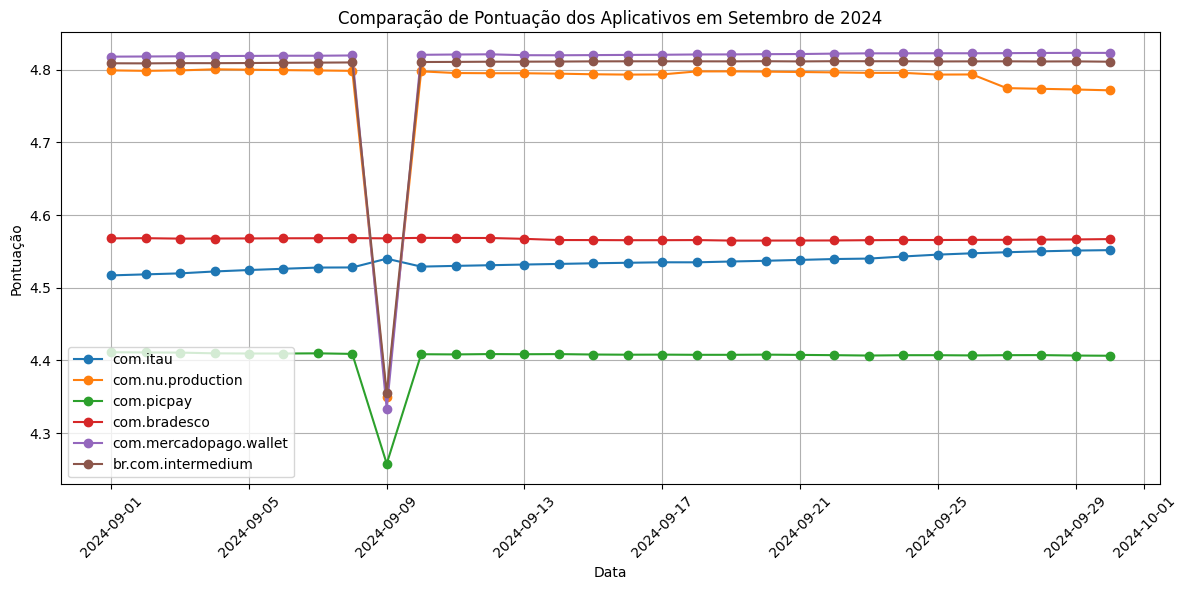

In [9]:
import matplotlib.pyplot as plt

# Filtrar os dados apenas para o mês de setembro
df['date'] = pd.to_datetime(df['date'])
df_septembro = df[df['date'].dt.month == 9]

# Criar gráfico
plt.figure(figsize=(12, 6))

for app in [app_id_itau] + concorrentes:
    dados_app = df_septembro[df_septembro['app_id'] == app]
    plt.plot(dados_app['date'], dados_app['score'], marker='o', label=app)

plt.title('Comparação de Pontuação dos Aplicativos em Setembro de 2024')
plt.xlabel('Data')
plt.ylabel('Pontuação')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


### Análise de Concorrência

In [10]:
# Calcular pontuação média e melhor/pior posição
analise_concorrencia = df_comparacao.groupby('app_id').agg(
    pontuacao_media=('score', 'mean'),
    melhor_posicao=('position', 'min'),
    pior_posicao=('position', 'max')
).reset_index()

print(analise_concorrencia)


                   app_id  pontuacao_media  melhor_posicao  pior_posicao
0      br.com.intermedium         4.795453               3             6
1            com.bradesco         4.566692              12            16
2                com.itau         4.534880               4            12
3  com.mercadopago.wallet         4.804430               2             3
4       com.nu.production         4.778525               1             1
5              com.picpay         4.403398               2             4


### Variação ao longo do mês

In [11]:
# Obter a posição inicial e final para cada aplicativo
variacao_posicao = df_septembro.groupby('app_id').agg(
    posicao_inicial=('position', 'first'),
    posicao_final=('position', 'last'),
    variacao_posicao=('position', lambda x: x.iloc[-1] - x.iloc[0])  # Diferença entre a última e a primeira posição
).reset_index()

print(variacao_posicao)


                   app_id  posicao_inicial  posicao_final  variacao_posicao
0      br.com.intermedium                4              5                 1
1            com.bradesco               16             13                -3
2                com.itau                7             10                 3
3  com.mercadopago.wallet                2              2                 0
4       com.nu.production                1              1                 0
5              com.picpay                3              3                 0


### Visualização dos Resultados

In [13]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


C:\Users\marcio.nogueira\AppData\Local\Temp\ipykernel_12984\3431354479.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=analise_concorrencia, x='app_id', y='pontuacao_media', palette='viridis')


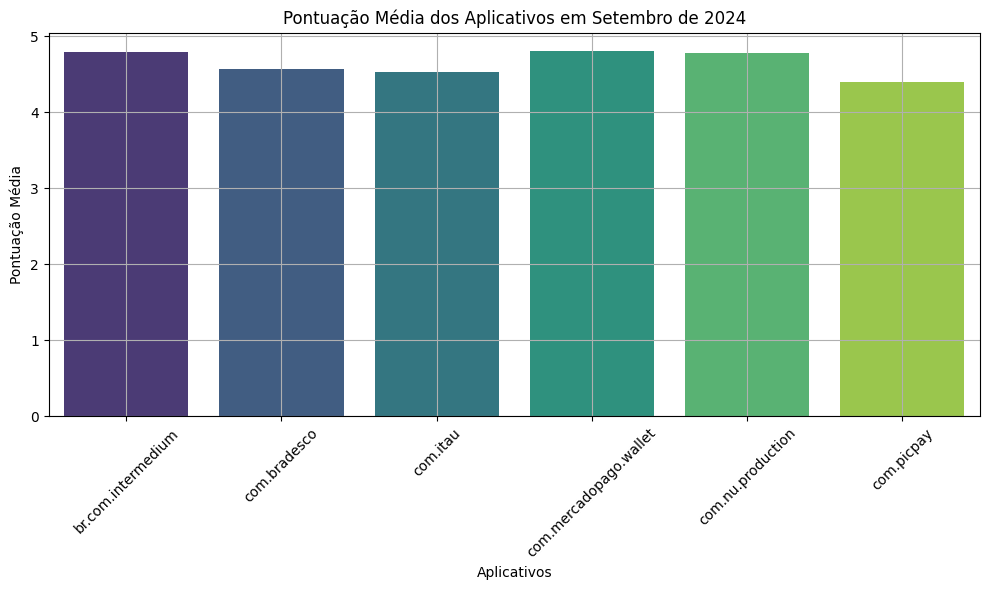

C:\Users\marcio.nogueira\AppData\Local\Temp\ipykernel_12984\3431354479.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=variacao_posicao, x='app_id', y='variacao_posicao', palette='rocket')


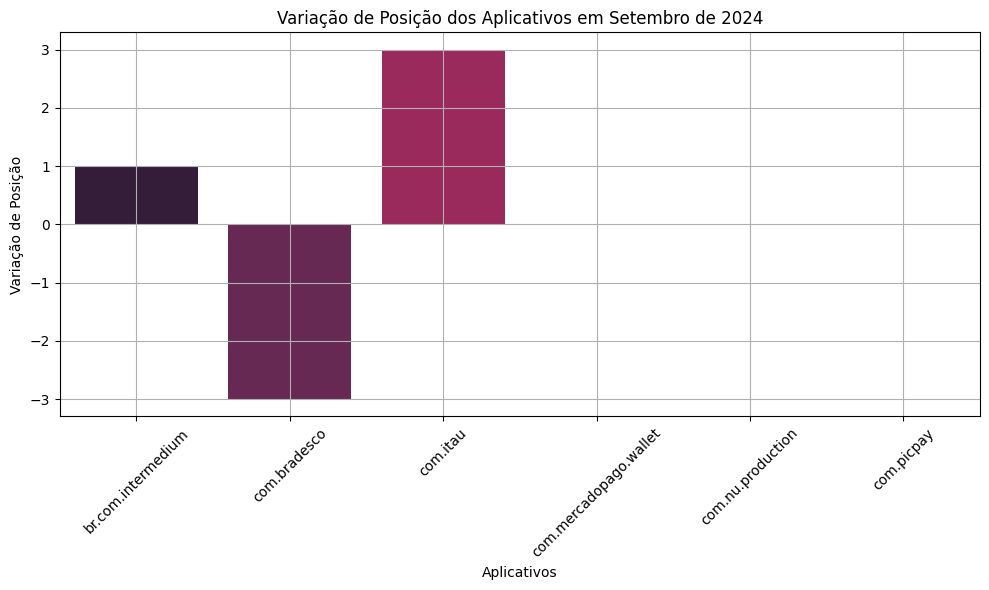

In [14]:
import seaborn as sns

# Gráfico de pontuação média
plt.figure(figsize=(10, 6))
sns.barplot(data=analise_concorrencia, x='app_id', y='pontuacao_media', palette='viridis')
plt.title('Pontuação Média dos Aplicativos em Setembro de 2024')
plt.xlabel('Aplicativos')
plt.ylabel('Pontuação Média')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Gráfico de variação de posição
plt.figure(figsize=(10, 6))
sns.barplot(data=variacao_posicao, x='app_id', y='variacao_posicao', palette='rocket')
plt.title('Variação de Posição dos Aplicativos em Setembro de 2024')
plt.xlabel('Aplicativos')
plt.ylabel('Variação de Posição')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()
